In [1]:
import mxnet as mx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:02:25.271636. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [57]:
!python /home/rakeshr/mxnet/tools/im2rec.py --list=1 --recursive=1 --shuffle=1 /home/rakeshr/code/kaggle/fisheries/data_train /home/rakeshr/code/kaggle/fisheries/train/train

ALB 0
BET 1
DOL 2
LAG 3
NoF 4
OTHER 5
SHARK 6
YFT 7


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 01:46:08.982829. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [59]:
!python ~/mxnet/tools/im2rec.py --num-thread=4 --pass-through=1 /home/rakeshr/code/kaggle/fisheries/data_train /home/rakeshr/code/kaggle/fisheries/train/train

Creating .rec file from /home/rakeshr/code/kaggle/fisheries/data_train.lst in /home/rakeshr/code/kaggle/fisheries
time: 0.0433030128479  count: 0
time: 0.396911859512  count: 1000
time: 0.389371156693  count: 2000
time: 0.286690950394  count: 3000


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 01:47:20.206015. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [60]:
!python ~/mxnet/tools/im2rec.py --num-thread=4 --pass-through=1 /home/rakeshr/code/kaggle/fisheries/data_valid /home/rakeshr/code/kaggle/fisheries/train/train

Creating .rec file from /home/rakeshr/code/kaggle/fisheries/data_valid.lst in /home/rakeshr/code/kaggle/fisheries
time: 0.000921964645386  count: 0


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 01:47:47.072213. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [45]:
augmenter = mx.image.CreateAugmenter(data_shape=(3, 227, 227), resize=256, rand_crop=True, rand_resize=True, rand_mirror=True)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 01:36:03.321582. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [46]:
data_iter = mx.image.ImageIter(batch_size=1, data_shape=(3, 227, 227), path_imgrec="/home/rakeshr/code/kaggle/fisheries/data_dummy.rec", 
                              aug_list=augmenter)

loading recordio...


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 01:36:04.992850. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


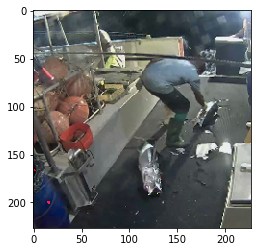

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 01:36:15.752490. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [52]:
data_iter.reset()
d1 = data_iter.next()
img = d1.data[0].asnumpy()[0]
plt.imshow(img.astype(np.uint8).transpose(1, 2, 0))

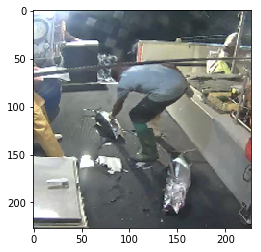

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 01:34:32.352706. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [32]:
data_iter.reset()
d1 = data_iter.next()
img = d1.data[0].asnumpy()[0]
plt.imshow(img.astype(np.uint8).transpose(1, 2, 0))

## ACTUAL PROCESSING

In [2]:
data_train = mx.io.ImageRecordIter(
    path_imgrec = "/home/rakeshr/code/kaggle/fisheries/data_train.rec",
    data_shape = (3, 227, 227), # output shape. 
    batch_size = 8,
    resize = 227,
    shuffle = True,
    #rand_crop = True,
    #min_crop_size = 227,
    #max_crop_size = 256,
    max_rotate_angle = 10,
    #max_aspect_ratio = 1.1,
    rand_mirror=True,
    max_random_contrast = 1.1,
    max_random_illumination = 1.1
)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:02:36.210667. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [3]:
data_valid_shuffle = mx.io.ImageRecordIter(
    path_imgrec = "/home/rakeshr/code/kaggle/fisheries/data_valid.rec",
    data_shape = (3, 227, 227), # output shape. 
    batch_size = 8,
    resize = 227,
    shuffle = True,
    rand_crop = True,
    #min_crop_size = 227,
    #max_crop_size = 256,
    max_rotate_angle = 5,
    #max_aspect_ratio = 1.1,
    #rand_mirror=True,
    #max_random_contrast = 1.1,
    #max_random_illumination = 1.1
)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:02:37.325136. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [4]:
data_valid = mx.io.ImageRecordIter(
    path_imgrec = "/home/rakeshr/code/kaggle/fisheries/data_valid.rec",
    data_shape = (3, 227, 227), # output shape. 
    batch_size = 8,
    resize = 227,
)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:02:38.429334. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


(3, 227, 227)


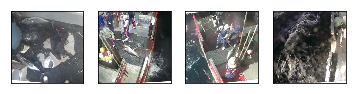

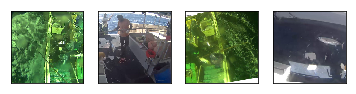

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 10:19:08.806343. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [5]:
#data_train.reset()
batch = data_train.next()
img = batch.data[0].asnumpy()[0]
print img.shape
for i in range(2):
    for j in range(4):
        plt.subplot(1, 4, j+1)
        plt.imshow(batch.data[0].asnumpy()[i*4+j].astype(np.uint8).transpose(1, 2, 0))
        plt.xticks([])
        plt.yticks([])
    plt.show()

In [5]:
def layer_mesh(net, nf, p):
    net = mx.sym.Pad(data=net, mode='constant', pad_width=(0,0,0,0,1,1,1,1))
    conv_1 = mx.sym.Convolution(data=net, kernel=(3,3), num_filter=nf)
    dp_1 = mx.sym.Dropout(data=conv_1, p=p)
    act_1 = mx.sym.Activation(data=dp_1, act_type='relu')
    bn_1 = mx.sym.BatchNorm(act_1)
    mp_1 = mx.sym.Pooling(data=bn_1, pool_type='max', kernel=(2,2), stride=(2,2))
    return mp_1

def layer_mesh_no_pooling(net, nf, p):
    net = mx.sym.Pad(data=net, mode='constant', pad_width=(0,0,0,0,1,1,1,1))
    conv_1 = mx.sym.Convolution(data=net, kernel=(3,3), num_filter=nf)
    dp_1 = mx.sym.Dropout(data=conv_1, p=p)
    act_1 = mx.sym.Activation(data=dp_1, act_type='relu')
    bn_1 = mx.sym.BatchNorm(act_1)
    #mp_1 = mx.sym.Pooling(data=bn_1, pool_type='max', kernel=(2,2), stride=(2,2))
    return bn_1

def dense(net, num_hidden, p):
    fc_1 = mx.sym.FullyConnected(data=net, num_hidden=num_hidden)
    dp_1 = mx.sym.Dropout(data=fc_1, p=p)
    act_1 = mx.sym.Activation(data=dp_1, act_type='relu')
    bn_1 = mx.sym.BatchNorm(data=act_1)
    return bn_1

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:02:41.843565. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [84]:
dp1 = 0 #0.1
dp2 = 0 #0.2
dp3 = 0 #0.3
dp4 = 0.2 #0.4

data = mx.sym.Variable(name='data', shape=(3, 227, 227))
net = mx.sym.BatchNorm(data)

net = layer_mesh(net, 16, dp1)
net = layer_mesh(net, 32, dp1)
net = layer_mesh(net, 64, dp1)
net = layer_mesh(net, 128, dp2)
net = layer_mesh(net, 128, dp2)
net = layer_mesh_no_pooling(net, 256, dp2)
net = layer_mesh_no_pooling(net, 256, dp3)
net = layer_mesh_no_pooling(net, 512, dp3)

net = mx.sym.Flatten(net)

net = dense(net, 4096, dp4)
net = dense(net, 1024, dp4)

net = mx.sym.FullyConnected(data=net, num_hidden=8)

net = mx.sym.SoftmaxOutput(data=net, name='softmax')

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 13:04:04.441135. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


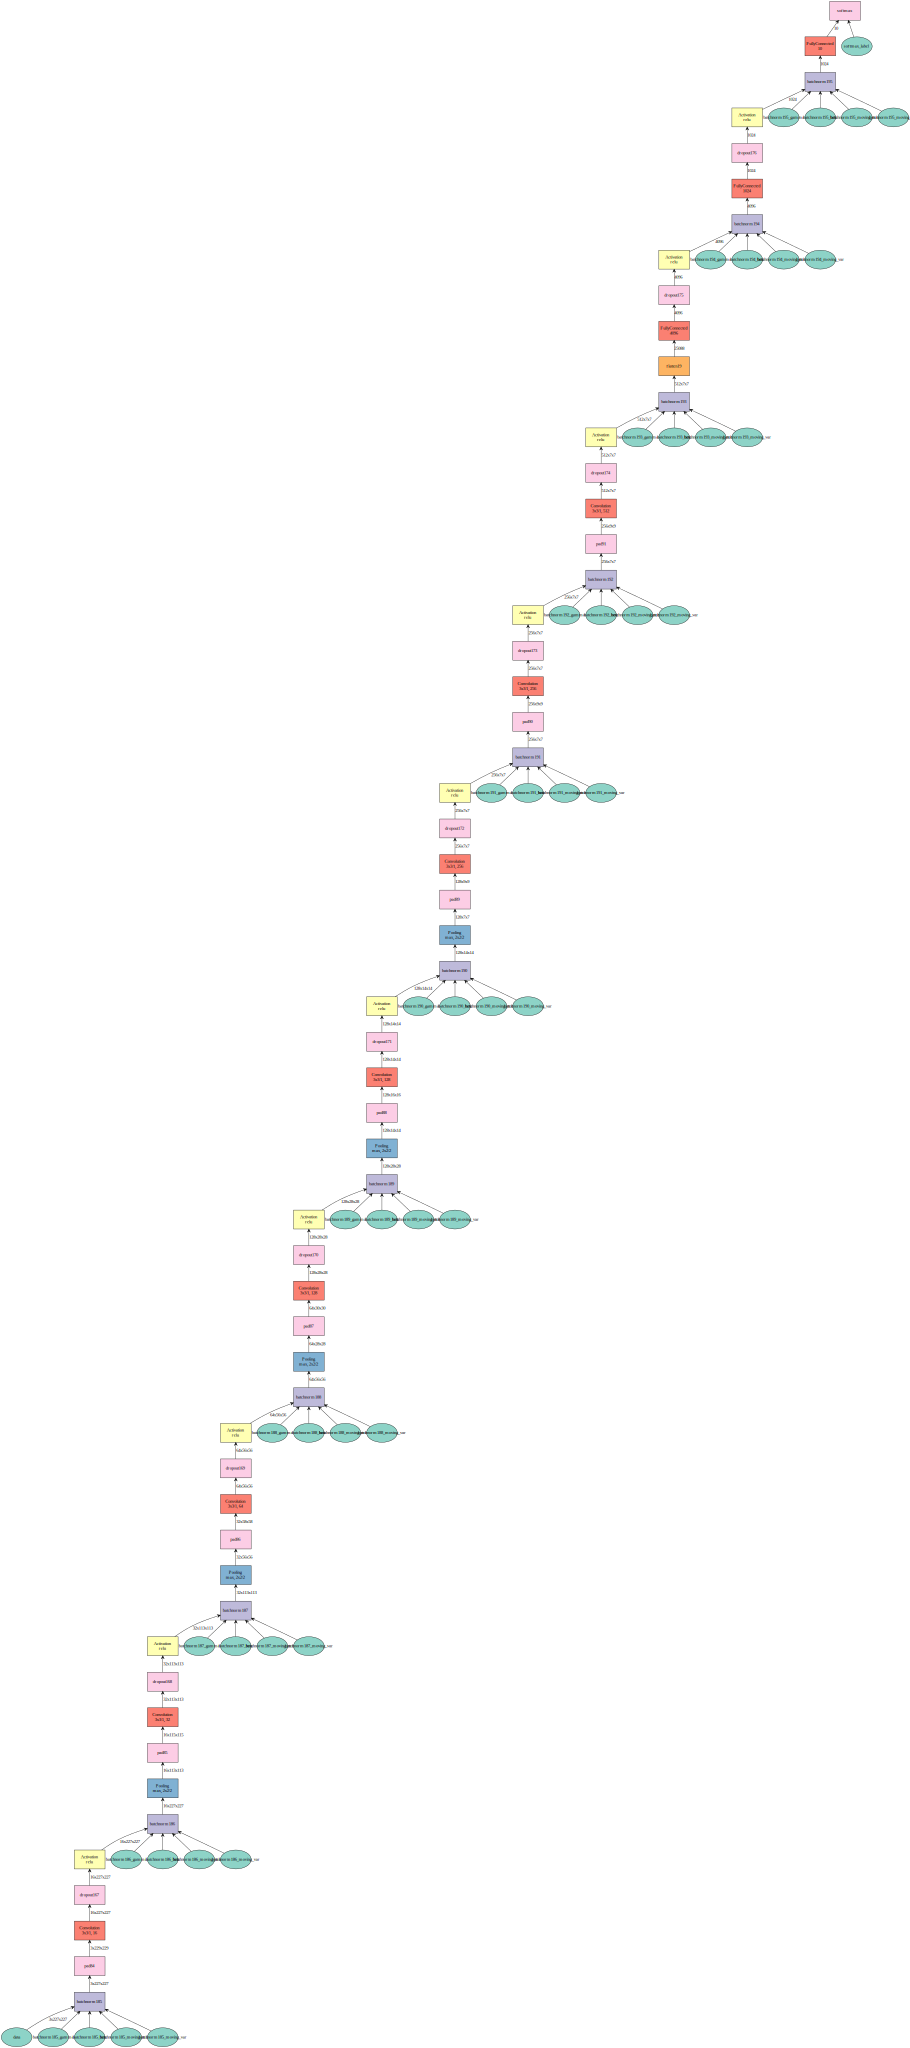

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 13:04:05.134179. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [85]:
mx.viz.plot_network(net, shape={'data':(1, 3, 227, 227)})

In [86]:
import logging
head = '%(asctime)-15s %(message)s'
logging.basicConfig(level=logging.DEBUG, format=head)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 13:04:08.703353. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [87]:
data_train.reset()
data_valid.reset()
#data_valid_shuffle.reset()


model_prefix = 'fisheries_expt'
batch_size = 8
num_ep = 3
#checkpoint = mx.callback.do_checkpoint(model_prefix)

# Most important attribtue -> fixed_param_names. This ensures that the parameters learnt by the 
# pre-trained model are not overwritten and only the alst FC layer is trained. 
mod = mx.mod.Module(symbol=net, context=mx.gpu(), data_names=('data',), label_names=('softmax_label',))

mod.bind(data_shapes=data_train.provide_data, label_shapes = data_train.provide_label)

#mod.bind(data_shapes=data_train.provide_data, label_shapes = data_train.provide_label)


# Xavier Initialization => Variance for random weight initialization = ( 2 / input_dim of the layer X output_dim of the layer)
mod.init_params(initializer=mx.initializer.Xavier(rnd_type='gaussian'))
mod.fit(data_train, data_valid, num_epoch=num_ep,
        batch_end_callback = mx.callback.Speedometer(batch_size, 25),
        kvstore='device',
        optimizer='rmsprop', optimizer_params={'learning_rate':0.01}, eval_metric='acc')

"""
mod.fit(data_train, data_valid, num_epoch=num_ep,
        batch_end_callback = mx.callback.Speedometer(batch_size, 25),
        kvstore='device',
        optimizer='rmsprop', optimizer_params={'learning_rate':0.01}, eval_metric='acc')
"""

metric = mx.metric.Accuracy()
print mod.score(data_valid, metric)

2017-05-04 13:04:12,078 Already binded, ignoring bind()
2017-05-04 13:04:17,619 Epoch[0] Batch [25]	Speed: 109.89 samples/sec	Train-accuracy=0.259615
2017-05-04 13:04:19,407 Epoch[0] Batch [50]	Speed: 111.95 samples/sec	Train-accuracy=0.250000
2017-05-04 13:04:21,196 Epoch[0] Batch [75]	Speed: 111.91 samples/sec	Train-accuracy=0.400000
2017-05-04 13:04:22,987 Epoch[0] Batch [100]	Speed: 111.80 samples/sec	Train-accuracy=0.290000
2017-05-04 13:04:24,803 Epoch[0] Batch [125]	Speed: 110.28 samples/sec	Train-accuracy=0.385000
2017-05-04 13:04:26,601 Epoch[0] Batch [150]	Speed: 111.35 samples/sec	Train-accuracy=0.315000
2017-05-04 13:04:28,393 Epoch[0] Batch [175]	Speed: 111.68 samples/sec	Train-accuracy=0.320000
2017-05-04 13:04:30,248 Epoch[0] Batch [200]	Speed: 107.91 samples/sec	Train-accuracy=0.320000
2017-05-04 13:04:32,358 Epoch[0] Batch [225]	Speed: 94.84 samples/sec	Train-accuracy=0.320000
2017-05-04 13:04:34,568 Epoch[0] Batch [250]	Speed: 90.57 samples/sec	Train-accuracy=0.265000

[('accuracy', 0.3926282051282051)]


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 13:04:11.975545. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [91]:
num_ep = 130
data_train.reset()
data_valid.reset()

mod.fit(data_train, data_valid, num_epoch=num_ep,
        batch_end_callback = mx.callback.Speedometer(batch_size, 25),
        kvstore='device', begin_epoch=124,
        optimizer='adam',  eval_metric='acc')

metric = mx.metric.Accuracy()
print mod.score(data_valid, metric)

2017-05-04 15:42:34,055 Already binded, ignoring bind()
2017-05-04 15:42:34,060 optimizer already initialized, ignoring...
2017-05-04 15:42:37,112 Epoch[123] Batch [25]	Speed: 85.50 samples/sec	Train-accuracy=0.937500
2017-05-04 15:42:39,107 Epoch[123] Batch [50]	Speed: 100.32 samples/sec	Train-accuracy=0.940000
2017-05-04 15:42:41,335 Epoch[123] Batch [75]	Speed: 89.80 samples/sec	Train-accuracy=0.940000
2017-05-04 15:42:43,417 Epoch[123] Batch [100]	Speed: 96.12 samples/sec	Train-accuracy=0.930000
2017-05-04 15:42:45,599 Epoch[123] Batch [125]	Speed: 91.72 samples/sec	Train-accuracy=0.950000
2017-05-04 15:42:47,893 Epoch[123] Batch [150]	Speed: 87.29 samples/sec	Train-accuracy=0.960000
2017-05-04 15:42:50,090 Epoch[123] Batch [175]	Speed: 91.10 samples/sec	Train-accuracy=0.910000
2017-05-04 15:42:52,192 Epoch[123] Batch [200]	Speed: 95.23 samples/sec	Train-accuracy=0.975000
2017-05-04 15:42:54,292 Epoch[123] Batch [225]	Speed: 95.30 samples/sec	Train-accuracy=0.960000
2017-05-04 15:4

[('accuracy', 0.8908227848101266)]


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 15:42:34.050724. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [92]:
mod.save_checkpoint(prefix=model_prefix, epoch=124)

2017-05-04 15:43:29,471 Saved checkpoint to "fisheries_expt-0124.params"
/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 15:43:29.216678. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Load trained model

In [6]:
model_prefix = 'fisheries_expt'
epoch_num = 145
sym, arg_params, aux_params = mx.model.load_checkpoint(model_prefix, epoch_num)

mod = mx.mod.Module(symbol=sym, context=mx.gpu(), data_names=('data',), label_names=('softmax_label',))
mod.bind(data_shapes=data_train.provide_data, label_shapes = data_train.provide_label)
mod.set_params(arg_params, aux_params)
metric = mx.metric.Accuracy()

print(mod.score(data_valid, metric))

[('accuracy', 0.9145569620253164)]


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:03:06.161546. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [7]:
import logging
head = '%(asctime)-15s %(message)s'
logging.basicConfig(level=logging.DEBUG, format=head)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 18:43:34.995344. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [10]:
num_ep = 150
batch_size = 8
data_train.reset()
data_valid.reset()

mod.fit(data_train, data_valid, num_epoch=num_ep,
        batch_end_callback = mx.callback.Speedometer(batch_size, 50),
        kvstore='device', begin_epoch=145,
        optimizer='adam', optimizer_params={'learning_rate':1e-6},  eval_metric='acc') #

metric = mx.metric.Accuracy()
print mod.score(data_valid, metric)

2017-05-04 18:47:13,601 Already binded, ignoring bind()
2017-05-04 18:47:18,261 Epoch[145] Batch [50]	Speed: 98.10 samples/sec	Train-accuracy=0.963235
2017-05-04 18:47:22,347 Epoch[145] Batch [100]	Speed: 97.92 samples/sec	Train-accuracy=0.962500
2017-05-04 18:47:26,343 Epoch[145] Batch [150]	Speed: 100.14 samples/sec	Train-accuracy=0.970000
2017-05-04 18:47:30,441 Epoch[145] Batch [200]	Speed: 97.63 samples/sec	Train-accuracy=0.972500
2017-05-04 18:47:34,469 Epoch[145] Batch [250]	Speed: 99.34 samples/sec	Train-accuracy=0.972500
2017-05-04 18:47:38,499 Epoch[145] Batch [300]	Speed: 99.31 samples/sec	Train-accuracy=0.982500
2017-05-04 18:47:42,527 Epoch[145] Batch [350]	Speed: 99.36 samples/sec	Train-accuracy=0.975000
2017-05-04 18:47:45,988 Epoch[145] Train-accuracy=0.985465
2017-05-04 18:47:45,989 Epoch[145] Time cost=32.386
2017-05-04 18:47:51,639 Epoch[145] Validation-accuracy=0.914557
2017-05-04 18:47:55,945 Epoch[146] Batch [50]	Speed: 93.37 samples/sec	Train-accuracy=0.960784
20

[('accuracy', 0.9113924050632911)]


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 18:47:13.594165. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [23]:
mod.save_checkpoint(prefix=model_prefix, epoch=145)

2017-05-04 18:24:11,475 Saved checkpoint to "fisheries_expt-0145.params"
/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 18:24:11.240329. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Model Evaluation

In [41]:
prediction = mod.predict(data_valid)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 20:15:25.386344. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [69]:
data_train.reset()
data_valid.reset()
counter = 0

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 20:18:49.823845. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


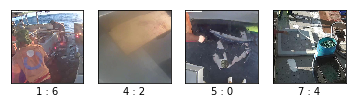

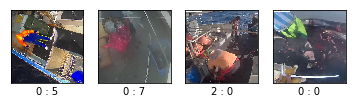

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 20:19:35.825080. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [75]:
batch = data_valid.next()
imgs = batch.data[0].asnumpy()
actual_label = batch.label[0].asnumpy()
predicted_label = np.argmax(prediction[counter*8:(counter*8+8)].asnumpy(), axis=1)
for i in range(2):
    for j in range(4):
        plt.subplot(1, 4, j+1)
        plt.imshow(imgs[4*i+j].astype(np.uint8).transpose((1, 2, 0)))
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(str(int(actual_label[4*i+j]))+" : "+str(predicted_label[4*i+j]))
    plt.show()
counter += 1

In [76]:
data_valid.reset()
error_dict = {0:{}, 1:{}, 2:{}, 3:{}, 4:{}, 5:{}, 6:{}, 7:{}}
total_correct = 0
counter = 0
while True:
    try:
        batch = data_valid.next()
        if batch.pad != 0:
            break
    except:
        break
    actual_label = batch.label[0].asnumpy()
    predicted_label = np.argmax(prediction[counter*8:(counter*8+8)].asnumpy(), axis=1)
    for i in range(8):
        if actual_label[i] != predicted_label[i]:
            if predicted_label[i] not in error_dict[int(actual_label[i])]:
                error_dict[int(actual_label[i])][predicted_label[i]] = 1
            else:
                error_dict[int(actual_label[i])][predicted_label[i]] += 1
    total_correct += np.sum(actual_label==predicted_label)
    counter += 1
print total_correct

570


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 20:22:31.668196. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [77]:
print error_dict

{0: {1: 2, 2: 1, 3: 1, 4: 5, 5: 1, 6: 2, 7: 2}, 1: {0: 1, 3: 1, 4: 1, 7: 1}, 2: {0: 1}, 3: {8: 3, 0: 2}, 4: {0: 12, 2: 1, 6: 5}, 5: {0: 2}, 6: {7: 2}, 7: {0: 2, 1: 2, 2: 1, 4: 3}, 8: {}, 9: {}}


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 20:22:42.125714. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## FINAL PREDICTIONS

In [80]:
!python /home/rakeshr/mxnet/tools/im2rec.py --list=1 --recursive=1 /home/rakeshr/code/kaggle/fisheries/stg2 /home/rakeshr/code/kaggle/fisheries/test_stg2

. 0


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 20:31:10.588705. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [81]:
!python ~/mxnet/tools/im2rec.py --num-thread=4 --pass-through=1 /home/rakeshr/code/kaggle/fisheries/stg2 /home/rakeshr/code/kaggle/fisheries/test_stg2

Creating .rec file from /home/rakeshr/code/kaggle/fisheries/stg2.lst in /home/rakeshr/code/kaggle/fisheries
time: 0.00105309486389  count: 0
time: 0.198588848114  count: 1000
time: 0.183407068253  count: 2000
time: 0.187514066696  count: 3000
time: 0.162389993668  count: 4000
time: 0.156879901886  count: 5000
time: 0.216743946075  count: 6000
time: 0.161799192429  count: 7000
time: 0.173267841339  count: 8000
time: 0.159357070923  count: 9000
time: 0.105601072311  count: 10000
time: 0.100186824799  count: 11000
time: 0.156439065933  count: 12000


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 20:31:14.545885. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [7]:
data_test = mx.io.ImageRecordIter(
    path_imgrec = "/home/rakeshr/code/kaggle/fisheries/stg2.rec",
    data_shape = (3, 227, 227), # output shape. 
    batch_size = 8,
    resize = 227,
)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:03:28.042125. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [8]:
predictions_test = mod.predict(data_test)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:03:30.770782. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [85]:
!python /home/rakeshr/mxnet/tools/im2rec.py --list=1 --recursive=1 /home/rakeshr/code/kaggle/fisheries/stg1 /home/rakeshr/code/kaggle/fisheries/test_stg1

. 0


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 20:41:17.866816. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [86]:
!python ~/mxnet/tools/im2rec.py --num-thread=4 --pass-through=1 /home/rakeshr/code/kaggle/fisheries/stg1 /home/rakeshr/code/kaggle/fisheries/test_stg1

Creating .rec file from /home/rakeshr/code/kaggle/fisheries/stg1.lst in /home/rakeshr/code/kaggle/fisheries
time: 0.00516605377197  count: 0


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 20:41:40.805839. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [9]:
data_test_stg1 = mx.io.ImageRecordIter(
    path_imgrec = "/home/rakeshr/code/kaggle/fisheries/stg1.rec",
    data_shape = (3, 227, 227), # output shape. 
    batch_size = 8,
    resize = 227,
)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:05:24.215133. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [10]:
predictions_test_stg1 = mod.predict(data_test_stg1)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:05:28.685351. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
pts1 = predictions_test_stg1.asnumpy()

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:05:48.932081. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [12]:
pts2 = predictions_test.asnumpy()

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:05:49.666128. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [13]:
stg1_filenames = []
stg2_filenames = []
with open('stg1.lst', 'r') as fp:
    line = fp.readline()
    while len(line) > 0:
        splt = line.split('\t')
        stg1_filenames.append(splt[-1].strip())
        line = fp.readline()
with open('stg2.lst', 'r') as fp:
    line = fp.readline()
    while len(line) > 0:
        splt = line.split('\t')
        stg2_filenames.append("test_stg2/"+splt[-1].strip())
        line = fp.readline()
print stg1_filenames[:5]
print stg2_filenames[:5]

['img_05989.jpg', 'img_02078.jpg', 'img_04482.jpg', 'img_02622.jpg', 'img_02666.jpg']
['test_stg2/image_01759.jpg', 'test_stg2/image_04974.jpg', 'test_stg2/image_08032.jpg', 'test_stg2/image_07320.jpg', 'test_stg2/image_02906.jpg']


/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:05:53.612401. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [15]:
with open('result.txt', 'w') as fp:
    for i in range(len(stg1_filenames)):
        line = stg1_filenames[i]+","
        add = ','.join(map(str,np.clip(pts1[i], 0.01, 0.5)[:8]))
        line += add+'\n'
        fp.write(line)
    for i in range(len(stg2_filenames)):
        line = stg2_filenames[i]+","
        add = ','.join(map(str,np.clip(pts2[i], 0.01, 0.5)[:8]))
        line += add+'\n'
        fp.write(line)

/usr/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2017-05-04 22:07:20.489414. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
